In [2]:
import glob, pdfkit, pandas as pd, numpy as np
from Bio import SwissProt, SeqIO, ExPASy
import seaborn as sns, matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
# import dataframe_image as dfi



In [4]:
df = pd.read_csv('newest_result/HTML_PLP_Mouse_1.tsv', sep = '\t')
df['Entry'] = df[df.columns[0]].str[0:6]
# mouse_proteome = pd.read_csv('https://www.uniprot.org/uniprot/?query=organism:10090&columns=id,entry%20name,reviewed,protein%20names,genes,organism,length,ec&format=tab', sep = '\t')
# human_proteome = pd.read_csv('https://www.uniprot.org/uniprot/?query=organism:9606&columns=id,entry%20name,reviewed,protein%20names,genes,organism,length,ec&format=tab', sep = '\t')
human_proteome = pd.read_csv('../mouse_uniprot.tsv', sep='\t')
dlg = pd.merge(human_proteome[['Entry','Gene names','Protein names','EC number']],df, on='Entry', how='right')#.drop(['Name'], axis=1)
tabella=dlg.sort_values(by=['LCaaM (kcal/mol)']).drop_duplicates(['Entry']).reset_index(drop=True)
tabella.index+=1
##tabella corta##
tab=tabella.loc[:,['Gene names', 'Protein names', 'EC number','LCaaM (kcal/mol)', 'Num in LC']].head(10)
tabella


,Entry,Gene names,Protein names,EC number,dlg file,ligand,BC (kcal/mol),Run,LC (kcal/mol),Run.1,...,Run.2,LCaa (kcal/mol),Run.3,LCaaB (kcal/mol),Run.4,LCaaM (kcal/mol),BB (kcal/mol),Run.5,LC,Num in LC
1,Q71RI9,Kyat3 Ccbl2 Kat3,Kynurenine--oxoglutarate transaminase 3 (EC 2....,2.6.1.7; 4.4.1.13; 2.6.1.63,Q71RI9-1_42_451_2zjg_pdb_HTML_PLP_1.dlg,HTL,-14.18,38,-14.18,38,...,38,-8.04,38,-8.39,41,-7.40,-8.39,41,1,27
2,Q8BWU8,Etnppl Agxt2l1,Ethanolamine-phosphate phospho-lyase (EC 4.2.3...,4.2.3.2,Q8BWU8_9_436_5g4i.1.A_swissmodel_HTML_PLP_2.dlg,HTL,-14.78,17,-14.78,17,...,17,-7.83,17,-8.10,1,-6.95,-8.16,5,1,23
3,P50431,Shmt1 Shmt,"Serine hydroxymethyltransferase, cytosolic (SH...",2.1.2.1,P50431_1_478_1eji_pdb_HTML_PLP_1.dlg,HTL,-13.84,3,-13.84,3,...,3,-7.66,3,-8.07,97,-6.62,-8.07,97,1,78
4,Q9ET01,Pygl,"Glycogen phosphorylase, liver form (EC 2.4.1.1)",2.4.1.1,Q9ET01_24_839_1xoi.1.A_swissmodel_HTML_PLP_1.dlg,HTL,-13.10,58,-13.10,58,...,58,-6.71,58,-7.15,99,-6.08,-7.15,99,1,54
5,Q99K85,Psat1 Psa Psat,Phosphoserine aminotransferase (PSAT) (EC 2.6....,2.6.1.52,Q99K85_17_370_3e77.1.A_swissmodel_HTML_PLP_1.dlg,HTL,-12.31,28,-10.15,85,...,28,-6.11,85,-7.03,97,-6.00,-7.03,97,8,8
6,P00860,Odc1 Odc,Ornithine decarboxylase (ODC) (EC 4.1.1.17),4.1.1.17,P00860_2_418_7odc_pdb_HTML_PLP_2.dlg,HTL,-13.17,6,-12.52,47,...,6,-6.75,47,-7.09,74,-5.95,-8.62,10,2,30
7,Q7TSV6,Got1l1,"Putative aspartate aminotransferase, cytoplasm...",2.6.1.1,Q7TSV6-1_3_399_2cst.1.A_swissmodel_HTML_PLP_2.dlg,HTL,-13.08,54,-13.08,54,...,54,-5.86,54,-7.17,62,-5.90,-7.17,62,1,47
8,Q6XPS7,Tha1 Gly1,L-threonine aldolase (Threonine aldolase 1),NaN,Q6XPS7_39_398_1lw4.1.D_swissmodel_HTML_PLP_2.dlg,HTL,-7.11,51,-3.20,76,...,51,-6.86,76,-7.16,43,-5.85,-7.16,43,4,40
9,Q8VC19,Alas1,"5-aminolevulinate synthase, nonspecific, mitoc...",2.3.1.37,Q8VC19_199_634_6hrh.1.B_swissmodel_HTML_PLP_2.dlg,HTL,-12.57,100,-12.57,100,...,100,-6.47,100,-6.86,79,-5.67,-6.89,33,1,60
10,Q8BGT5,Gpt2 Aat2,Alanine aminotransferase 2 (ALT2) (EC 2.6.1.2)...,2.6.1.2,Q8BGT5_49_521_3ihj.1.A_swissmodel_HTML_PLP_1.dlg,HTL,-10.82,94,-10.82,94,...,94,-5.72,94,-6.76,6,-5.61,-6.76,6,1,28


In [4]:
# tab[tab['Gene names'].str.contains('SHMT', regex=False)]='background: lightgreen'
tab


,Gene names,Protein names,EC number,LCaaM (kcal/mol),Num in LC
1,Kyat3 Ccbl2 Kat3,Kynurenine--oxoglutarate transaminase 3 (EC 2....,2.6.1.7; 4.4.1.13; 2.6.1.63,-7.40,27
2,Etnppl Agxt2l1,Ethanolamine-phosphate phospho-lyase (EC 4.2.3...,4.2.3.2,-6.95,23
3,Shmt1 Shmt,"Serine hydroxymethyltransferase, cytosolic (SH...",2.1.2.1,-6.62,78
4,Pygl,"Glycogen phosphorylase, liver form (EC 2.4.1.1)",2.4.1.1,-6.08,54
5,Psat1 Psa Psat,Phosphoserine aminotransferase (PSAT) (EC 2.6....,2.6.1.52,-6.00,8
6,Odc1 Odc,Ornithine decarboxylase (ODC) (EC 4.1.1.17),4.1.1.17,-5.95,30
7,Got1l1,"Putative aspartate aminotransferase, cytoplasm...",2.6.1.1,-5.90,47
8,Tha1 Gly1,L-threonine aldolase (Threonine aldolase 1),NaN,-5.85,40
9,Alas1,"5-aminolevulinate synthase, nonspecific, mitoc...",2.3.1.37,-5.67,60
10,Gpt2 Aat2,Alanine aminotransferase 2 (ALT2) (EC 2.6.1.2)...,2.6.1.2,-5.61,28


# docking df with highlighted rows

In [6]:
def mycolors(x):
    color = 'white'
    if x.name == 34 or x.name == 48:
        color = 'lightgreen'
    elif x.name == 1 or x.name == 8:
        color = 'lightblue'
    return ['background-color: '+color for v in x]
styled_table = tab.style.apply(mycolors,axis=1)
# cm = sns.light_palette("seagreen", as_cmap=True)
# styled_table = tab.style.background_gradient()
# styled_table = tab.style.bar(subset=['Num in LC'],color='limegreen')
# styled_table = tab.style.apply(lambda x: ['background: lightgreen' 
#                                   if (x.name == 6 or x.name == 8)
#                                   else '' for i in x],axis=1)
styled_table
html = styled_table.render()
pdfkit.from_string(html, 'styled_table.pdf', options= {'page-size':'A2'})

,Gene names,Protein names,EC number,LCaaM (kcal/mol),Num in LC
1,Kyat3 Ccbl2 Kat3,Kynurenine--oxoglutarate transaminase 3 (EC 2.6.1.7) (Cysteine-S-conjugate beta-lyase 2) (EC 4.4.1.13) (Kynurenine aminotransferase 3) (Kynurenine aminotransferase III) (KATIII) (Kynurenine--glyoxylate transaminase) (EC 2.6.1.63) (Kynurenine--oxoglutarate transaminase III),2.6.1.7; 4.4.1.13; 2.6.1.63,-7.400000,27
2,Etnppl Agxt2l1,Ethanolamine-phosphate phospho-lyase (EC 4.2.3.2) (Alanine--glyoxylate aminotransferase 2-like 1),4.2.3.2,-6.950000,23
3,Shmt1 Shmt,"Serine hydroxymethyltransferase, cytosolic (SHMT) (EC 2.1.2.1) (Glycine hydroxymethyltransferase) (Serine methylase)",2.1.2.1,-6.620000,78
4,Pygl,"Glycogen phosphorylase, liver form (EC 2.4.1.1)",2.4.1.1,-6.080000,54
5,Psat1 Psa Psat,Phosphoserine aminotransferase (PSAT) (EC 2.6.1.52) (Endometrial progesterone-induced protein) (EPIP) (Phosphohydroxythreonine aminotransferase),2.6.1.52,-6.000000,8
6,Odc1 Odc,Ornithine decarboxylase (ODC) (EC 4.1.1.17),4.1.1.17,-5.950000,30
7,Got1l1,"Putative aspartate aminotransferase, cytoplasmic 2 (EC 2.6.1.1) (Glutamate oxaloacetate transaminase 1-like protein 1) (Transaminase A-like protein 1)",2.6.1.1,-5.900000,47
8,Tha1 Gly1,L-threonine aldolase (Threonine aldolase 1),nan,-5.850000,40
9,Alas1,"5-aminolevulinate synthase, nonspecific, mitochondrial (ALAS-H) (EC 2.3.1.37) (5-aminolevulinic acid synthase 1) (Delta-ALA synthase 1) (Delta-aminolevulinate synthase 1)",2.3.1.37,-5.670000,60
10,Gpt2 Aat2,Alanine aminotransferase 2 (ALT2) (EC 2.6.1.2) (Glutamate pyruvate transaminase 2) (GPT 2) (Glutamic--alanine transaminase 2) (Glutamic--pyruvic transaminase 2),2.6.1.2,-5.610000,28


# regression scatter plot

In [13]:
bo = []
for tab in glob.glob('newest_result/*.tsv'):
    df = pd.read_csv(tab, sep = '\t')
    df['Entry'] = df[df.columns[0]].str[0:6]
    mouse_proteome = pd.read_csv('../../mouse_uniprot.tsv', sep = '\t')
    human_proteome = pd.read_csv('../../human_uniprot.tsv', sep = '\t')
    ligand = df['ligand'][0]
    if 'Human' in tab:
        dlg = pd.merge(human_proteome[['Entry','Gene names','Protein names','Organism']],df, on='Entry', how='right')#.drop(['Name'], axis=1)
        organism = 'Human'
    else:
        dlg = pd.merge(mouse_proteome[['Entry','Gene names','Protein names','Organism']],df, on='Entry', how='right')#.drop(['Name'], axis=1)
        organism = 'Mouse'
    df1=dlg.sort_values(by='BC (kcal/mol)').drop_duplicates(['Entry']).reset_index(drop=True)
    df1.index+=1
    df1[ligand]=df1.index
    df1['Gene names']=df1['Gene names'].str.split(" ", expand=True)[0]
    bo.append(df1.loc[:,['Gene names',ligand]])
f=pd.concat(bo).groupby('Gene names').first()
w=f.sort_values(by='PLP')
# u['mean']=u.mean(axis=1)
# u=u.sort_values(by='mean')

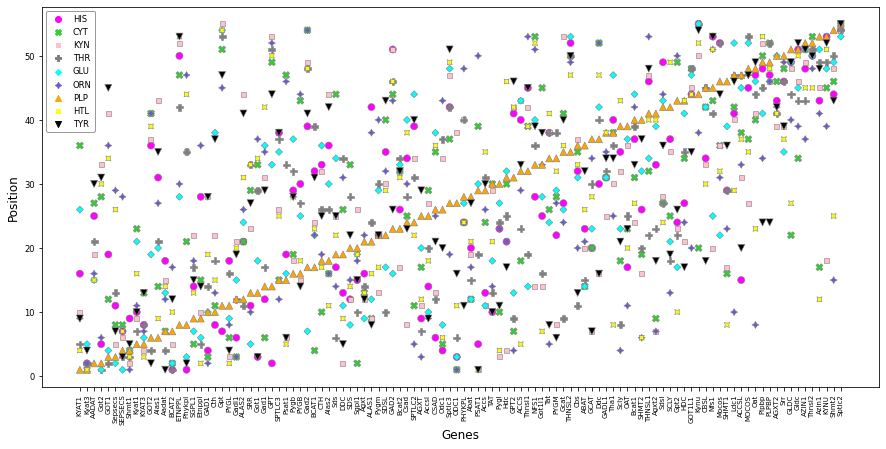

In [8]:
### plotting
plt.figure(figsize=(15,7))
ax=sns.scatterplot(data=u,
                   palette={'HIS':'magenta',
                           'CYT':'limegreen',
                           'KYN':'pink',
                           'THR':'gray',
                           'GLU':'cyan',
                           'ORN':'slateblue',
                           'PLP':'orange',
                           'HTL':'yellow',
                           'TYR':'black'},
                   edgecolor='gray',
                   s=50)
plt.xticks(rotation=90, 
            fontweight='light',
            fontsize='x-large')
plt.legend(fontsize='small',loc='upper left',edgecolor='gray')
plt.xticks(fontsize='x-small')
plt.yticks(fontsize='small')
ax.set(xlabel="X Label", ylabel = "Y Label")
plt.xlabel('Genes', fontsize='large')
plt.ylabel('Position', fontsize='large')
# ax.set(ylim=(56,0))
plt.savefig("total_scatter_lcaam.svg")

In [21]:
pd.DataFrame(u.corr(method ='pearson').drop(['PLP'],axis=1))
# best=0.754869 (p), 0.595524 (k)
# LC=0.733057 (p), 0.577926 (k)
# largest res mean=0.495963(p), 0.357664 (k)

,HIS,CYT,KYN,THR,GLU,ORN,HTL,TYR
HIS,1.000000,0.456693,0.526075,0.587508,0.605272,0.364144,0.478603,0.630225
CYT,0.456693,1.000000,0.408688,0.576248,0.505344,0.569173,0.550915,0.382403
KYN,0.526075,0.408688,1.000000,0.478337,0.432690,0.278709,0.552893,0.642892
THR,0.587508,0.576248,0.478337,1.000000,0.665297,0.531895,0.529575,0.499372
GLU,0.605272,0.505344,0.432690,0.665297,1.000000,0.311841,0.432614,0.563277
ORN,0.364144,0.569173,0.278709,0.531895,0.311841,1.000000,0.401460,0.261021
PLP,0.656282,0.467077,0.369242,0.608049,0.685153,0.314314,0.401384,0.466202
HTL,0.478603,0.550915,0.552893,0.529575,0.432614,0.401460,1.000000,0.465061
TYR,0.630225,0.382403,0.642892,0.499372,0.563277,0.261021,0.465061,1.000000


In [42]:
bo = []
for tab in glob.glob('newest_result/*.tsv'):
    df = pd.read_csv(tab, sep = '\t')
    df['Entry'] = df[df.columns[0]].str[0:6]
    mouse_proteome = pd.read_csv('../../mouse_uniprot.tsv', sep = '\t')
    human_proteome = pd.read_csv('../../human_uniprot.tsv', sep = '\t')
    ligand = df['ligand'][0]
    if 'Human' in tab:
        dlg = pd.merge(human_proteome[['Entry','Gene names','Protein names','Organism']],df, on='Entry', how='right')#.drop(['Name'], axis=1)
        organism = 'Human'
    else:
        dlg = pd.merge(mouse_proteome[['Entry','Gene names','Protein names','Organism']],df, on='Entry', how='right')#.drop(['Name'], axis=1)
        organism = 'Mouse'
    df1=dlg.sort_values(by='LCaaM (kcal/mol)').drop_duplicates(['Entry']).reset_index(drop=True)
    df1.index+=1
    df1['Position']=df1.index
    df1['Gene names']=df1['Gene names'].str.split(" ", expand=True)[0]
    bo.append(df1.loc[:,['Gene names','Position']])

f=pd.concat(bo).groupby('Gene names').first()
cc=pd.concat(bo)
cc=cc.sort_values(by='Position')


Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            54, 55, 55, 55, 55, 55, 55, 55, 55, 55],
           dtype='int64', length=972)

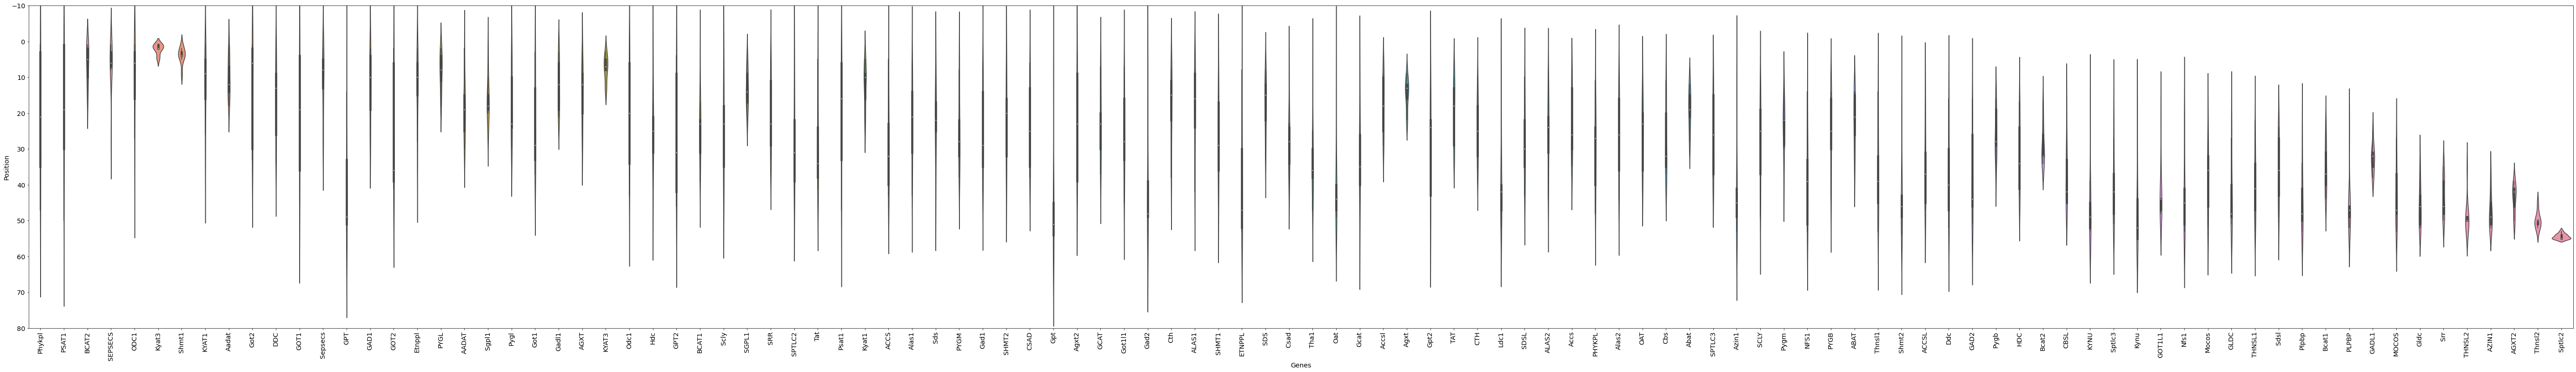

In [43]:
plt.figure(figsize=(100,13))

ax=sns.violinplot(x=cc['Gene names'], y=cc['Position'],fliersize=20)
plt.xticks(rotation=90, 
            fontweight='light',
            fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xlabel('Genes', fontsize='x-large')
plt.ylabel('Position', fontsize='x-large')
ax.set(ylim=(80,-10))
plt.savefig('violinplot.pdf')

In [66]:
cc.sort_values(by='Position')

,Gene names,Position
1,Kyat3,1
1,KYAT3,1
1,GOT1,1
1,SEPSECS,1
1,KYAT3,1
...,...,...
55,Shmt2,55
55,Shmt2,55
55,Shmt2,55
55,Gpt,55


In [ ]:
df=pd.merge(plp,html,on='Entry')
correlation = df.loc[:,['PLP','HTML_PLP']].corr(method='pearson')
plot=sns.regplot(x=df.PLP, y=df.HTML_PLP)
plot.figure.savefig("mean.pdf")

correlation

# ax2 = df.plot.scatter(x='index1_x',
#                       y='index1_y',
#                       colormap='viridis')


# create maxitab with all merged dataframe

In [2]:
maxitab = []
for tab in glob.glob('newest_result/*PLP*.tsv'):
    df = pd.read_csv(tab, sep = '\t')
    df['Entry'] = df[df.columns[0]].str[0:6]
    ## open proteome organism ##
    mouse_proteome = pd.read_csv('../../mouse_uniprot.tsv', sep = '\t')
    human_proteome = pd.read_csv('../../human_uniprot.tsv', sep = '\t')
    if 'Human' in tab:
        dlg = pd.merge(human_proteome[['Entry','Gene names','Protein names','Organism']],df, on='Entry', how='right')#.drop(['Name'], axis=1)
    else:
        dlg = pd.merge(mouse_proteome[['Entry','Gene names','Protein names','Organism']],df, on='Entry', how='right')#.drop(['Name'], axis=1)
        
    ## dictionary for substrate-enzyme matching
    enzyme =   {'GLU':['P48320','P48318','P05202', 'P05201', 'P17174', 'P00505', 'Q99259', 'Q05329'],
                'TYR':['Q8QZR1','O88533', 'P17735', 'P20711'],
                'HIS':['P23738', 'P19113'],
                'HTL':[],#'Q6XPS7', 'P34896', 'P34897','P50431'],
                'KYN':['Q8BTY1', 'Q71RI9', 'Q9CXF0', 'Q16773', 'Q8N5Z0', 'Q6YP21', 'Q16719'],
                'CYT':['Q8VCN5', 'P32929'],
                'ORN':['P29758', 'P04181'],#P00860 P11926
                'THR':['P20132', 'Q8VBT2', 'Q96GA7', 'Q8R238'],
                'PLP':[]}
    for column in dlg.drop(['BB (kcal/mol)', 'LCaaB (kcal/mol)'],axis=1):
        if 'kcal' in column:
            df1 = dlg.sort_values(by=[column]).drop_duplicates(['Entry']).reset_index(drop=True)
            df1.index+=1
            df1[column]=df1.index
            maxitab.append(df1.filter(items=['Entry','ligand',column]))
######
#             tab=df1.loc[:,['Gene names', 'Protein names',column, 'Num in Largest Cluster']]
#             styled_table = tab.style.apply(lambda x: ['background: lightgreen' 
#                                           if (x.name in df1[df1['Entry'].isin(enzyme.get(df.columns[0]))].index.to_list())
#                                           else '' for i in x], axis=1)
#             html = styled_table.render()
#             pdfkit.from_string(html, df.columns[0]+'_'+column.replace(" ", "_").strip(' (kcal/mol)')+organism+'.pdf', options= {'page-size':'A2'})
#######
        else:
            df_random = dlg.sample(frac=1).drop_duplicates(['Entry']).reset_index(drop=True)
            df_random.index+=1
            df_random['Random']=df_random.index
            maxitab.append(df_random.filter(items=['Entry','ligand','Random']))

# Create tab for plotting

In [10]:
pp=[]
tab_position=pd.concat(maxitab).groupby(['ligand','Entry']).first()
for k,v in enzyme.items():
    pp.append(tab_position.loc[(k,v),:])
ddf=pd.concat(pp)
v=pd.DataFrame(ddf.T.stack().stack())
v.reset_index(inplace=True)
v.rename(columns={'level_0':'Method',0:'Position','ligand':'Ligand'},inplace=True)
v.replace(regex='.*kcal.$', value='')


,Method,Entry,Ligand,Position
0,Random,O88533,TYR,39.0
1,Random,P00505,GLU,52.0
2,Random,P04181,ORN,17.0
3,Random,P05201,GLU,32.0
4,Random,P05202,GLU,8.0
...,...,...,...,...
169,LCaaM (kcal/mol),Q8VBT2,THR,6.0
170,LCaaM (kcal/mol),Q8VCN5,CYT,11.0
171,LCaaM (kcal/mol),Q96GA7,THR,10.0
172,LCaaM (kcal/mol),Q99259,GLU,10.0


# Create Boxenplot+swarmplot with ranking position with ligand hue

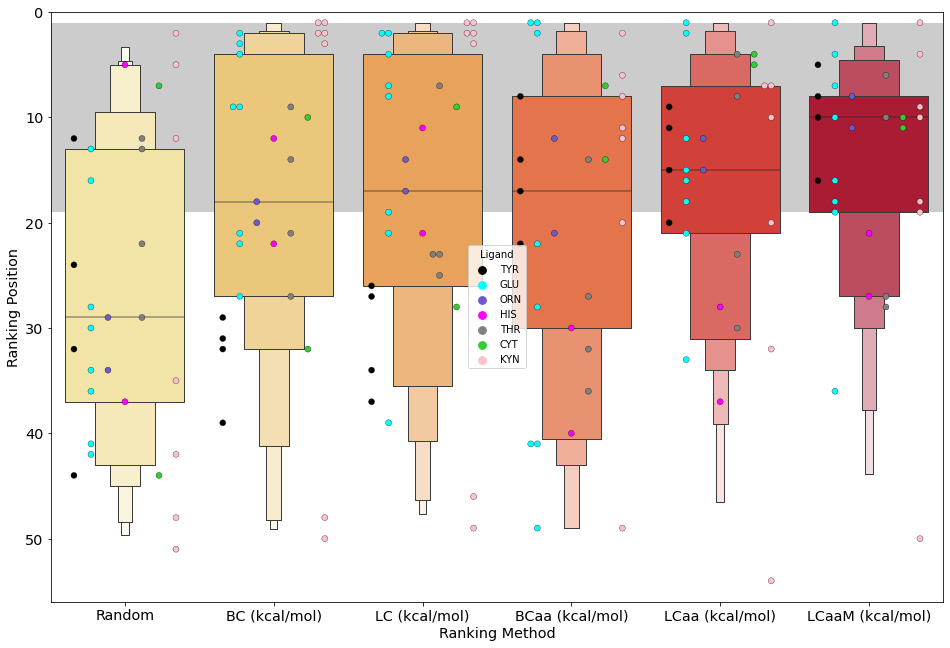

In [31]:
fig, ax = plt.subplots(figsize =(16, 13)) 
sns.boxenplot(x='Method',y='Position', data=v,
#               color='lightorange',
              palette = "YlOrRd",
              k_depth='full',
              showfliers=False)
p1=sns.swarmplot(x='Method',y='Position',hue='Ligand', data=v,
              dodge=True,
              palette={'HIS':'magenta',
                       'CYT':'limegreen',
                       'KYN':'pink',
                       'THR':'gray',
                       'GLU':'cyan',
                       'ORN':'slateblue',
                       'PLP':'orange',
                       'HTL':'yellow',
                       'TYR':'black'},
              size=6,
              linewidth=0.3)
plt.xticks(rotation=0, 
            fontweight='light',
            fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xlabel('Ranking Method', fontsize='x-large')
plt.ylabel('Ranking Position', fontsize='x-large')
ax.axhspan(1, min(ddf.quantile(0.75)), facecolor = '0.5',
                  alpha = 0.4,
                  zorder = 0)

ax.set(ylim=(56,0))
plt.gcf().subplots_adjust(bottom=0.25)

plt.savefig("boxenplot.svg")

In [20]:
# x.loc['PLP','Best Cluster (kcal/mol)']
best,mean,largest=[],[],[]
for k,v in enzyme.items():
    best.append(tab_position.loc[k,'Best Cluster (kcal/mol)'])
    largest.append(x.loc[k,'Largest Cluster (kcal/mol)'])
    mean.append(tab_position.loc[k,'Largest Cluster Res Mean (kcal/mol)'])

# g=pd.concat(best, axis=1)
# plot=sns.scatterplot(x=g.iloc[:,8],y=g.iloc[:,0])
# plot=sns.scatterplot(x=g.iloc[:,8],y=g.iloc[:,1])
# plot=sns.scatterplot(x=g.iloc[:,8],y=g.iloc[:,2])
# plot=sns.scatterplot(x=g.iloc[:,8],y=g.iloc[:,3])
# plot=sns.scatterplot(x=g.iloc[:,8],y=g.iloc[:,4])
# plot=sns.scatterplot(x=g.iloc[:,8],y=g.iloc[:,5])
# plot=sns.scatterplot(x=g.iloc[:,8],y=g.iloc[:,6])
# plot=sns.scatterplot(x=g.iloc[:,8],y=g.iloc[:,7])
# plot.figure.savefig("mean.pdf")
z=pd.DataFrame(x.loc[(['PLP','GLU']),'Best Cluster (kcal/mol)'])
z.reset_index(inplace=True) 
sns.scatterplot(x='Entry',y='Best Cluster (kcal/mol)', data=z)
# tabellone1[tabellone1['ligand']=='PLP']
z.sort

AttributeError: 'Index' object has no attribute 'loc'

In [ ]:
a=tips.T.reindex(tips.T.mean().sort_values().index, axis=1)
# for column in a:
#     print(a[column].idxmin())
# b=a.loc[['Largest Cluster','bestbest']].plot.line(legend=None)
b=a.plot.line(legend=None)
b.set_xticklabels(a.get_xticklabels(), 
                   rotation = 45, 
                   ha = 'center')
plt.savefig("lines.pdf")
min(tips.quantile(0.75))

In [ ]:
df = pd.DataFrame({'col1': np.random.rand(100), 'col2': np.random.rand(100)})
sns.violinplot(y=df);

In [414]:
df = pd.read_csv('https://www.uniprot.org/uniprot/?query=reviewed:yes+AND+organism:9606&columns=id,entry%20name,reviewed,protein%20names,genes,organism,length,feature(NATURAL%20VARIANT),feature(BINDING%20SITE),feature(ACTIVE%20SITE),database(ENSEMBL)&format=tab', sep = '\t')


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Entry,Entry name,Protein names,Gene names,Organism,Length,Natural variant,Binding site,Active site,ENSEMBL transcript
0,Q9H553,ALG2_HUMAN,"Alpha-1,3/1,6-mannosyltransferase ALG2 (EC 2.4...",ALG2 UNQ666/PRO1298,Homo sapiens (Human),416,"VARIANT 11; /note=""S -> P (in dbSNP:rs1154513...",NaN,NaN,ENST00000319033 [Q9H553-2];ENST00000476832 [Q9...
1,Q96QF7,ACRC_HUMAN,Acidic repeat-containing protein (Germ cell nu...,GCNA ACRC,Homo sapiens (Human),691,"VARIANT 471; /note=""R -> H (in dbSNP:rs102179...",NaN,NaN,ENST00000373695;ENST00000373696;
2,Q13023,AKAP6_HUMAN,A-kinase anchor protein 6 (AKAP-6) (A-kinase a...,AKAP6 AKAP100 KIAA0311,Homo sapiens (Human),2319,"VARIANT 337; /note=""A -> V (in dbSNP:rs374292...",NaN,NaN,ENST00000280979 [Q13023-1];ENST00000557354 [Q1...
3,Q8WTP8,AEN_HUMAN,Apoptosis-enhancing nuclease (EC 3.1.-.-) (Int...,AEN ISG20L1 SBBI58,Homo sapiens (Human),325,"VARIANT 15; /note=""P -> L (in dbSNP:rs3743477...",NaN,NaN,ENST00000332810 [Q8WTP8-1];
4,Q7Z7M1,AGRD2_HUMAN,Adhesion G-protein coupled receptor D2 (G-prot...,ADGRD2 GPR144 PGR24,Homo sapiens (Human),963,NaN,NaN,NaN,ENST00000334810;
...,...,...,...,...,...,...,...,...,...,...
192651,A3FG63,A3FG63_HUMAN,MHC class I antigen (Fragment),HLA-A,Homo sapiens (Human),181,NaN,NaN,NaN,NaN
192652,A0A5C2GK09,A0A5C2GK09_HUMAN,IG c208_light_IGKV4-1_IGKJ3 (Fragment),NaN,Homo sapiens (Human),113,NaN,NaN,NaN,NaN
192653,A0A4Y5USH5,A0A4Y5USH5_HUMAN,NLRP3 (Fragment),NLRP3 CIAS1,Homo sapiens (Human),39,NaN,NaN,NaN,NaN
192654,A0A024R6T9,A0A024R6T9_HUMAN,Transporter,SLC6A2 hCG_2025341,Homo sapiens (Human),617,NaN,NaN,NaN,NaN


In [49]:
variant=df['Natural variant'].str.split(pat='VARIANT',expand=True)

KeyError: 'Natural variant'

In [ ]:
df.loc[df['Entry']=='P35520']

In [ ]:
https://www.uniprot.org/uniprot/?query=organism:10090&columns=id,entry%20name,reviewed,protein%20names,genes,organism,length,ec&format=tab

In [ ]:
# df.set_index(['Entry'])
# df['Binding site'].str.split(pat='BINDING',expand=True).loc['P35520',:]
# mouse_proteome[mouse_proteome['Entry'].isin(accession)]['Gene names']
# mouse_proteome['Entry','Gene names']

In [32]:
from zeep import Client
import hashlib

wsdl = "https://www.brenda-enzymes.org/soap/brenda_zeep.wsdl"
password = hashlib.sha256("myPassword".encode("utf-8")).hexdigest()
client = Client(wsdl)
parameters = ( "j.doe@example.edu",password,"ecNumber*1.1.1.1","organism*Homo sapiens","kmValue*",
              "kmValueMaximum*","substrate*","commentary*","ligandStructureId*","literature*" )
resultString = client.service.getKmValue(*parameters)
print (resultString)


[]


In [47]:
kegg_ec=pd.read_csv('http://rest.kegg.jp/link/ec/cpd:C02291+C00025+C00082+C00135+C00328+C00188+C0007', sep = ':|\t', usecols = [1,3], names=['Compound ID', 'EC number'])
kegg_name=pd.read_csv('http://rest.kegg.jp/list/cpd:C02291+C00025+C00082+C00135+C00328+C00188+C00077', sep = ';|\t|:', header=None)
kegg_name=kegg_name.reset_index()
kegg_name.loc[:,['level_1','level_2']]
kegg_ec[kegg_ec['level_1'].str.contains("C00077")]

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


KeyError: 'level_1'

In [39]:
bo = []
for tab in glob.glob('new_result/*PLP*.tsv'):
    df = pd.read_csv(tab, sep = '\t')
    print(df.columns[0])
    df['Entry'] = df[df.columns[0]].str[0:6]
    mouse_proteome = pd.read_csv('../../mouse_uniprot.tsv', sep = '\t')
    human_proteome = pd.read_csv('../../human_uniprot.tsv', sep = '\t')
    if 'Human' in tab:
        dlg = pd.merge(human_proteome[['Entry','Gene names','Protein names','EC number']],df, on='Entry', how='right')#.drop(['Name'], axis=1)
    else:
        dlg = pd.merge(mouse_proteome[['Entry','Gene names','Protein names','EC number']],df, on='Entry', how='right')#.drop(['Name'], axis=1)
    dlg['EC number']=dlg['EC number'].str.split(pat=';')
    dlg=dlg.explode('EC number').reset_index(drop=True)
    dlg['EC number']=dlg['EC number'].str.strip()

    comp = (pd.merge(kegg_ec, dlg[['Entry','EC number']]
             .drop_duplicates(['Entry','EC number']), on='EC number')
             .groupby('Compound ID')['Entry']
             .apply(list)
             .to_dict())
        
    ec = {'GLU':'C00025',
          'TYR':'C00082',
          'HIS':'C00135',
          'KYN':'C00328',
          'CYT':'C02291',
          'ORN':'C00077',
          'THR':'C00188',
          'HTL':''
         }
    
    rank = {}
    
    for column in dlg:
        if 'kcal' in column:
#             df1 = dlg.sort_values(by=['Num in Largest Cluster'], ascending=[False]).drop_duplicates(['Entry']).sort_values(by=[column]).reset_index(drop=True)
            df1 = dlg.sort_values(by=[column]).drop_duplicates(['Entry']).reset_index(drop=True)
            df1.index+=1
            rank.setdefault(column,df1[df1['Entry'].isin(comp.get(ec.get(df.columns[0])))].index.to_list())
        else:
            df_random = dlg.sample(frac=1).drop_duplicates(['Entry']).reset_index(drop=True)
            rank.setdefault('random', df_random[df_random['Entry'].isin(comp.get(ec.get(df.columns[0])))].index.to_list())
    bo.append(rank)
d = {}
for k in bo[0].keys():
    d[k] = np.concatenate(list(d[k] for d in bo))


HIS
CYT
KYN
THR
GLU
HIS
ORN


TypeError: only list-like objects are allowed to be passed to isin(), you passed a [NoneType]

In [38]:
maxitab = []
for tab in glob.glob('newest_result/*PLP*.tsv'):
    df = pd.read_csv(tab, sep = '\t')
    df['Entry'] = df[df.columns[0]].str[0:6]
    ## open proteome organism ##
    mouse_proteome = pd.read_csv('../../mouse_uniprot.tsv', sep = '\t')
    human_proteome = pd.read_csv('../../human_uniprot.tsv', sep = '\t')
    if 'Human' in tab:
        dlg = pd.merge(human_proteome[['Entry','Gene names','Protein names','Organism']],df, on='Entry', how='right')#.drop(['Name'], axis=1)
    else:
        dlg = pd.merge(mouse_proteome[['Entry','Gene names','Protein names','Organism']],df, on='Entry', how='right')#.drop(['Name'], axis=1)
        
    ## dictionary for substrate-enzyme matching
    comp = (pd.merge(kegg_ec, dlg[['Entry','EC number']]
         .drop_duplicates(['Entry','EC number']), on='EC number')
         .groupby('Compound ID')['Entry']
         .apply(list)
         .to_dict())
        
    ec = {'GLU':'C00025',
          'TYR':'C00082',
          'HIS':'C00135',
          'KYN':'C00328',
          'CYT':'C02291',
          'ORN':'C00077',
          'THR':'C00188',
          'HTL':''}
    
    for column in dlg.drop(['BB (kcal/mol)', 'LCaaB (kcal/mol)'],axis=1):
        if 'kcal' in column:
            df1 = dlg.sort_values(by=[column]).drop_duplicates(['Entry']).reset_index(drop=True)
            df1.index+=1
            df1[column]=df1.index
            maxitab.append(df1.filter(items=['Entry','ligand',column]))
######
#             tab=df1.loc[:,['Gene names', 'Protein names',column, 'Num in Largest Cluster']]
#             styled_table = tab.style.apply(lambda x: ['background: lightgreen' 
#                                           if (x.name in df1[df1['Entry'].isin(enzyme.get(df.columns[0]))].index.to_list())
#                                           else '' for i in x], axis=1)
#             html = styled_table.render()
#             pdfkit.from_string(html, df.columns[0]+'_'+column.replace(" ", "_").strip(' (kcal/mol)')+organism+'.pdf', options= {'page-size':'A2'})
#######
        else:
            df_random = dlg.sample(frac=1).drop_duplicates(['Entry']).reset_index(drop=True)
            df_random.index+=1
            df_random['Random']=df_random.index
            maxitab.append(df_random.filter(items=['Entry','ligand','Random']))

KeyError: "['EC number'] not in index"